# Chapter 02: Descriptive Statistic and Inferential statistic


In [5]:
# Configuração para o notebook e plotagem de imagens
from IPython.display import Latex
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def jupyter_settings():
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
   # display(HTML('<style>.container { width:100% !important; }</style>'))
    sns.set()

jupyter_settings()


Both are the main ares of statistics and we can define them as:

- Descriptive statistic provides tools to summarize and describe a sample, providing a clear picture of the data at hand.
- Inferencial statistic allow us to make broader conclusions and predictions about an entire population based on the insights drawn from the sample.

The goal in statistics is to make a statement about the population, however, in most cases it is not possible to get all data of the population, so a representative sample is taken. This sample is then analyzed using descriptive statistic, which helps summarize key characteristics, such as the mean and the variability within the sample. However, describing the sample may not be sufficient to make a statement about the population as a whole. In these cases, inferential statistic is used to make predictions about the population based on the sample.

## Understanding data types

The data can be organize in four types:

 - Nominal data: Is a group of data labeled with distinct groupings.
 - Ordinal data: Is a group of data labeled with distinct groupings too but exhibits an order.
 - Interval data: Is used to describe data that exist on an interval scale but does not have a clear definition of zero.
 - Ratio data: Is like interval data, but is ordered numeric  data, but unlike interval data, ratio data has an absolute zero.

 We can also organizer this four groups in two groups:

- Qualitative data: Nominal and Ordinal data. This groups usually are categorical data and we use the barplot for this cases.
- Quantitative data: Interval and Ratio data. This groups usually are numeric data and we use the histplot for this cases.

Plotting Qualitative Data



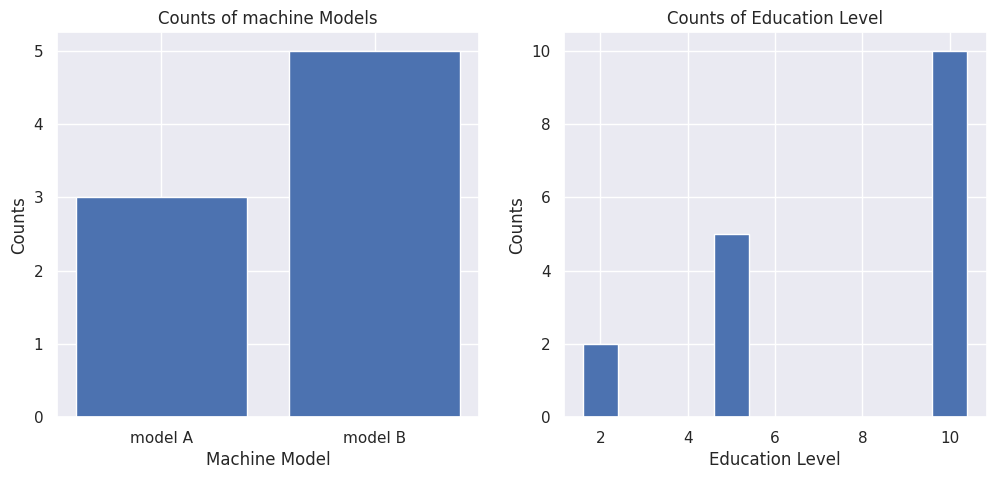

In [6]:
import matplotlib.pyplot as plt

print("Plotting Qualitative Data")
print()
label = ['model A', 'model B']
counts = [3, 5]
edu_label = ['BS', 'MS', 'PhD']
edu_counts = [10, 5, 2]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(label, counts)
ax[0].set_title('Counts of machine Models')
ax[0].set_ylabel('Counts')
ax[0].set_xlabel('Machine Model')

ax[1].bar(edu_counts, edu_counts)
ax[1].set_title('Counts of Education Level')
ax[1].set_ylabel('Counts')
ax[1].set_xlabel('Education Level')

plt.show()


Numeric plots


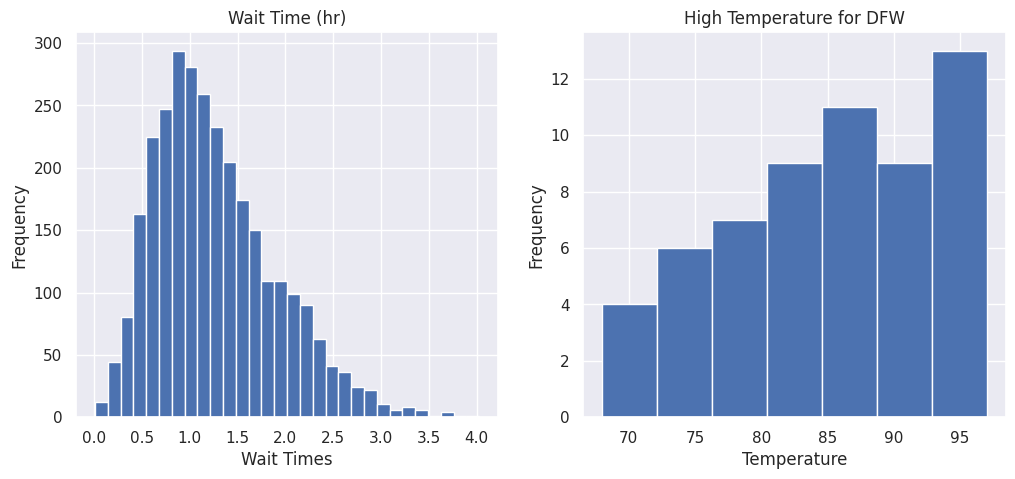

In [ ]:
from scipy.stats import skewnorm

a = 4
x = skewnorm.rvs(a, size=3000) + 0.5
x = x[ x > 0]
dfw_highs = [85, 87, 75, 88, 80, 86, 90, 94, 93, 92, 90, 92, 94, 93, 97, 90, 95, 96, 96, 95, 92, 70, 79, 73, 88, 92, 94, 93, 95, 76, 78, 86, 81, 95, 77, 71, 69, 88, 86,
             89, 84, 82, 77, 84, 81, 79, 75, 75, 91, 86, 86, 84, 82, 68, 75, 78, 82, 83, 85]

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].hist(x, bins=30)
ax[0].set_title('Wait Time (hr)')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Wait Times')

ax[1].hist(dfw_highs, bins=7)
ax[1].set_title('High Temperature for DFW')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Temperature')

plt.show()


## Measuring and describing distributions

In this section we will cover the topics:

- Central Tendency
- Variability
- Shape

### Measuring central tendency

We have three types of measurements of central tendency:

- **Mode:** Give us the most commonly occurring instance. The dataset can be Unimodal or Multimodal

In [8]:
# Example of mode

from scipy.stats import mode
m = mode([1, 2, 3, 4, 4, 4, 5, 5])
print(f"The mode is {m.mode} with a count of {m.count} instances")

The mode is 4 with a count of 3 instances


- **Median:**  Is the middle value occurring when the values are arranged in an order.

In [9]:
# Example of median
import numpy as np
values = [85, 99, 70, 86, 88, 94, 105]
median = np.median(values)

print(f"The median values is {median:.2f}")

The median values is 88.00


- **Mean or Average:** Is defined by the following equations: $$\bar{X} = \frac{\sum_{i=0}^n}{n}$$

In [10]:
# Example of mean
mean = np.mean(values)
print(f"The mean values is {mean:.2f}")

The mean values is 89.57


## Confidence intervals


In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pandas as pd 
import numpy as np 
import scipy.stats

df_duncan = sm.datasets.get_rdataset("Duncan", "carData").data
df_duncan.loc[df_duncan['type'] == 'prof', 'type'] = "professional"
df_duncan.loc[df_duncan['type'] == 'wc', 'type'] = "white-collar"
df_duncan.loc[df_duncan['type'] == 'bc', 'type'] = "blue-collar"

df_professional = df_duncan.loc[(df_duncan['type'] == 'professional')]
df_blue_collar = df_duncan.loc[(df_duncan['type'] == 'blue-collar')]

In [12]:
df_duncan.head()

,type,income,education,prestige
rownames,,,,
accountant,professional,62,86,82
pilot,professional,72,76,83
architect,professional,75,92,90
author,professional,55,90,76
chemist,professional,64,86,90


The dataset contains 45 observations (occupations) and 4 variables:

- type (string) - Type of occupation:
    - "prof"→ Professional/administrative
    - "wc" → Blue-collar worker (laborer)
    - "bc" → White-collar worker (non-manual, but without professional requirements)
- income (numeric) - Percentage of workers in the occupation earning $3,500 or more per year (in 1961 values).
- education (numeric) - Percentage of workers in the occupation who completed high school.

In [13]:
def plot_distributions(n_replicas, professional_sample, blue_collar_sample, professional_label, blue_collar_label, p = 5):
    fig, ax = plt.subplots(2, 1, figsize=(10,8))
    fig.subplots_adjust(hspace=0.5)
    ax[0].hist(professional_sample, alpha=0.3, bins=20)
    ax[0].axvline(professional_sample.mean(), color='black', linewidth=5)
    ax[0].set_xlabel("Income")
    ax[0].set_ylabel("Num. of Professional")
    ax[1].set_xlabel("Income")
    ax[1].set_ylabel("Num. of Professional")

# sampling distribution mean
    ax[0].axvline(np.percentile(professional_sample, p/2.), color='red', linewidth=3, alpha=0.99)

# 95% CI Lower Limit (if bootstrapping)
    ax[0].axvline(np.percentile(professional_sample, 100-p/2.), color='red', linewidth=3, alpha=0.99)
# 95% CI Upper Limit (if bootstrapping)
    ax[0].title.set_text(str(professional_label) + f"\nn = {n_replicas}")
    ax[1].hist(blue_collar_sample, alpha=.3, bins=20)
    ax[1].axvline(blue_collar_sample.mean(), color='black', linewidth=5)
    ax[1].axvline(np.percentile(blue_collar_sample, p/2.), color='red', linewidth=3, alpha=0.99)
# 95% CI Lower Limit (if bootstrapping)
    ax[1].axvline(np.percentile(blue_collar_sample, 100-p/2.), color='red', linewidth=3, alpha=0.99)
# 95% CI Upper Limit (if bootstrapping)
    ax[1].title.set_text(str(blue_collar_label)+ f"\nn = {n_replicas}")

    if n_replicas > 1:
        print("Analysis for Professional type job")
        print("-"*40)
        print(f"Lower confidence interval limit: {np.percentile(round(professional_sample, 4), p/2.):.2f}")
        print(f"Upper confidencial interval limit: {np.percentile(round(professional_sample, 4), 100-p/2.):.2f}")
        print(f"Mean: {round(professional_sample, 4).mean():.2f}")
        print(f"Standard Error: {round(professional_sample.std()/np.sqrt(n_replicas), 4):.2f}")
        print(f"The number of sample: {n_replicas}")
        print("="*40)
        print("Analysis for Blue-Collar type job")
        print("-"*40)
        print(f"Lower confidence interval limit: {np.percentile(round(blue_collar_sample, 4), p/2.):.2f}" )
        print(f"Upper confidencial interval limit: {np.percentile(round(blue_collar_sample, 4), 100-p/2.):.2f}")
        print(f"Mean: {round(blue_collar_sample, 4).mean():.2f}")
        print(f"Standard Error: {round(blue_collar_sample.std()/np.sqrt(n_replicas), 4):.2f}")
        print(f"The number of sample: {n_replicas}")
        plt.show()
    else:
        plt.show()
        print("At least two samples required to create the following statistics:\nConfidence Intervals\nMean\nStandard Error")
        

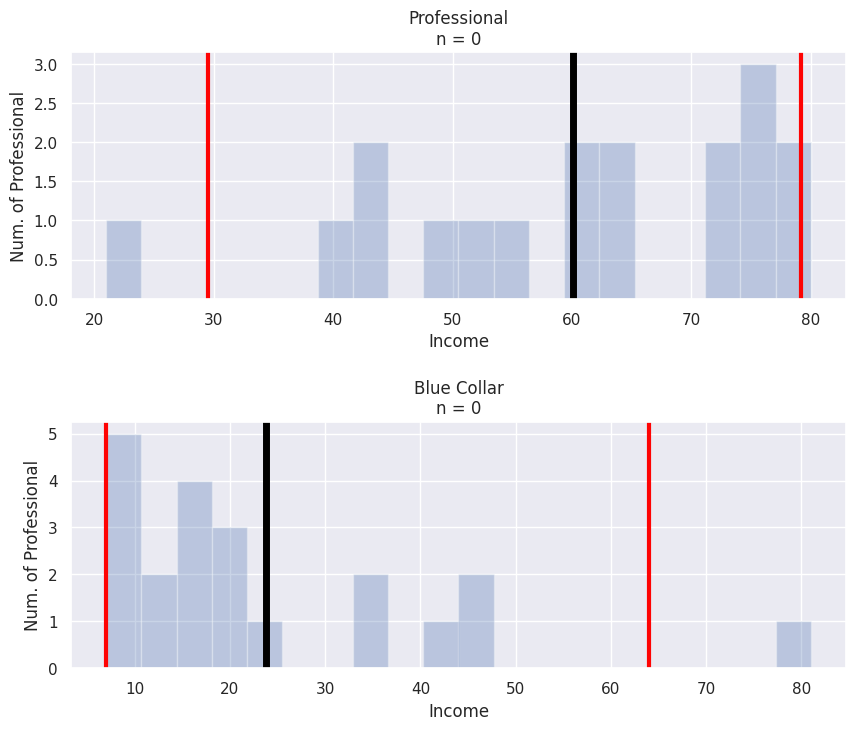

At least two samples required to create the following statistics:
Confidence Intervals
Mean
Standard Error


In [14]:
n_repllicas = 0
plot_distributions(n_replicas=n_repllicas, professional_sample=df_professional['income'],
blue_collar_sample=df_blue_collar['income'],
professional_label="Professional",
blue_collar_label='Blue Collar')

For the before case, we did use any Resamples. It's just the original dataset. 
Where for professional job type ranges from 29.50 to 79.15 with an average 0f 60.06 with the 95% confidence interval. For blue-collar we have 7.00 to 64.00 with the a mean of 23.76.

If we look the plot, we can notice that has a overlapping in the confidence intervals. Which it would be reasonable to assume there is no statistically significant difference in incomes between blue-collar and professional job type. To see that we can get some statistically significance, we will use the bootstrap. 

In [15]:
n_replicas = 1000
professional_bootstrap_means = pd.Series([df_professional.sample(frac=0.5, replace=True)['income'].mean() for i in range(n_replicas)])
blue_collar_bootstrap_means = pd.Series([df_blue_collar.sample(frac=0.5, replace=True)['income'].mean() for i in range(n_replicas)])

Analysis for Professional type job
----------------------------------------
Lower confidence interval limit: 49.21
Upper confidencial interval limit: 69.78
Mean: 60.32
Standard Error: 0.17
The number of sample: 1000
Analysis for Blue-Collar type job
----------------------------------------
Lower confidence interval limit: 14.50
Upper confidencial interval limit: 36.20
Mean: 23.76
Standard Error: 0.18
The number of sample: 1000


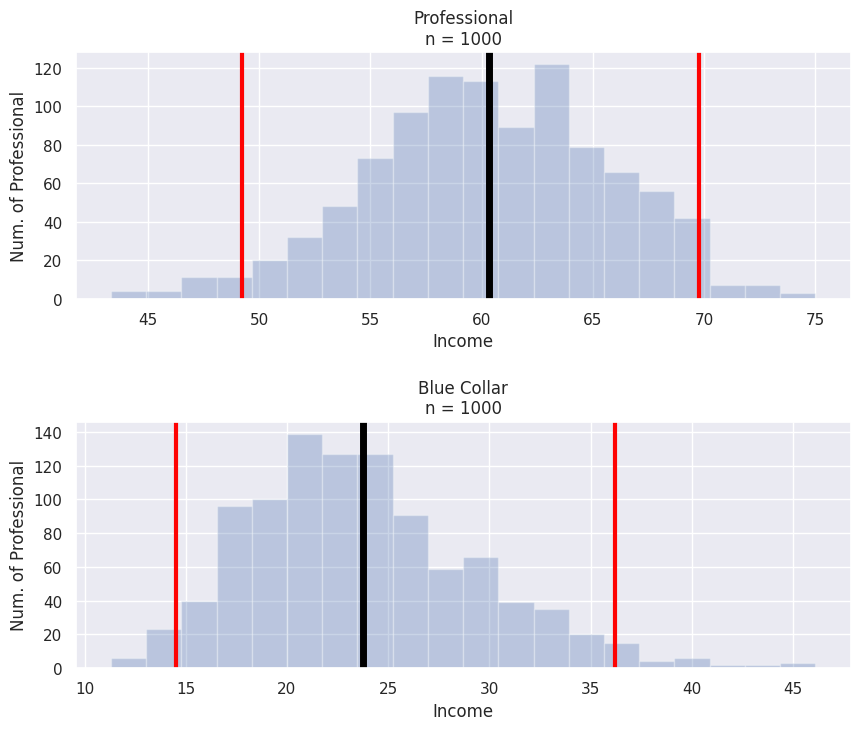

In [16]:
plot_distributions(n_replicas=n_replicas, professional_sample=professional_bootstrap_means,
blue_collar_sample=blue_collar_bootstrap_means,
professional_label="Professional",
blue_collar_label='Blue Collar')

After performing the bootstrapping procedure, we can see income has started to distribute in a standard normal and the confidence intervals no longer overlap. The implication of the separation of the confidence intervals between the professional and blue-collar groups is that with a 95% level of confidence, it can be shown there is a statistically significant difference between of the two job type. The confidence interval for the professional income levels is now 48.55 to 70.11 with a mean of 59.00, and for blue-collar, 14.20 to 36.30 with a mean of 23.87.

## Standard error

$$\frac{\sigma}{\sqrt{n}}$$ 

It's the distributions of means obtained through the bootstrapping process dived by the square root of the number of sample. The standard error decrease with the number of the samples increase.

In [17]:
n_replicas = [10, 100, 1000]
professional_bootstrap_means = np.random.rand(1000)  # Simulando valores aleatórios
blue_collar_bootstrap_means = np.random.rand(1000)

# Cabeçalho formatado
print(f"{'n'.ljust(10)} {'Professional Standard Error'.ljust(30)} {'Blue-Collar Standard Error'}")

# Linha separadora
print("-" * 70)

# Loop para imprimir valores alinhados corretamente
for n in n_replicas:
    professional_se = scipy.stats.sem(professional_bootstrap_means[:n])
    blue_collar_se = scipy.stats.sem(blue_collar_bootstrap_means[:n])
    
    print(f"{str(n).ljust(20)} {professional_se:.5f}".ljust(50), f"{blue_collar_se:.5f}")

n          Professional Standard Error    Blue-Collar Standard Error
----------------------------------------------------------------------
10                   0.09235                       0.10101
100                  0.03054                       0.03073
1000                 0.00901                       0.00919


## Correlation coefficient (Pearson's correlation coefficient)

The Pearson's correlation is normalized form of Covariance, that is, it measures the strength and directions of the linear relationship between two variables.

In [45]:
df_prof_corr = df_professional.sample(n=10)
df_blue_corr = df_blue_collar.sample(n=10)

corr1, _ = scipy.stats.pearsonr(df_prof_corr['income'], df_blue_corr['income'])
print(corr1)

-0.06707893437586888


In [49]:
n_replicas = [10,1000,10000,100000]

for n in n_replicas:
    professional_bootstrap_means = pd.Series([df_prof_corr.sample(frac=0.5, replace=False).income.mean() for i in range(n)])
    blue_collar_bootstrap_means = pd.Series([df_blue_corr.sample(frac=0.5, replace=False).income.mean() for i in range(n)])

    corr, _ = scipy.stats.pearsonr(professional_bootstrap_means, blue_collar_bootstrap_means)
    print(corr)

-0.4193271885739148
0.05181066651699924
-0.010977592687082148
0.003380294371951661


The value of correlation change with the number of samples. The higher the number of samples, the more accurate the correlation coefficient.

## Permutation testing

In [50]:
import numpy as np
# Create permutation testing function
def permutation_test(A, B, n_iter = 1000):
# A, B are 2 lits of samples to test the hypothesis,
# n_iter is number of iterations with the default is 1000
    differences = []
    P = np.array(A + B)
    original_mean = np.array(A).mean() - np.array(B).mean()
    for i in range(n_iter):
        np.random.shuffle(P) # create a random permutation of P
        A_new = P[:len(A)] # having the same size of A
        B_new = P[-len(B):] # having the same size of B
        differences.append(A_new.mean()-B_new.mean())
    # Calculate p_values
    p_value = round(1-(float(len(np.where(differences <= original_mean)[0]))/float(n_iter)),2)
    return p_value

In [51]:
A = [3, 5, 6]
B = [43, 41, 56, 78, 54]

permutation_test(A, B, n_iter=1000)

0.97